In [3]:
import pandas as pd

pd.set_option('display.max_rows', 100)

C:\Users\jrisk\AppData\Local\Temp\ipykernel_48624\685147853.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_df_num['log_Score'] = np.log(np.abs(run_df_num['Score'])+1e-10)




Run Num: 10000 ------
count    1077.000000
mean       -1.401029
std         0.446855
min        -2.000000
25%        -1.719431
50%        -1.510851
75%        -1.233131
max         1.146106
Name: Score, dtype: float64


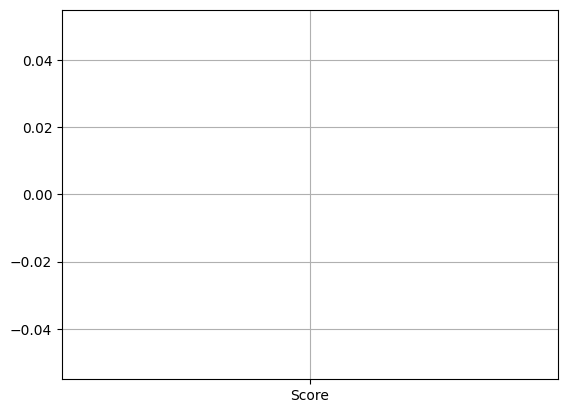

In [4]:
df_res_list = []

#for run_id in [1,5,2,6,3,7,4,8]:
for run_id in [10000]:
    go_explore = True
    reward_type = 2
    lawn_num = 22
    #run_id = 1

    #%%

    log_dir = "../PPO_logs"
    sub_dir = 'go_explore_' + str(go_explore) + '/reward_function' + str(reward_type) + "/"
    env_name = f"lawn{lawn_num}"
    log_dir = log_dir + '/' + env_name + '/' + sub_dir


    #### create new log file for each run
    log_f_name = log_dir + '/' + str(run_id) + ".csv"''

    #%%

    run_df = pd.read_csv(log_f_name)

    #%%

    run_df.columns

    #%%

    run_df_num = run_df[['Perc_done', 'Frames', 'Score', 'Fuel_Score', 'Grass_Score',
                     'Num_Fuel_Obtained', 'Amt_Fuel_Obtained', 'End_Fuel',
                     'End_x', 'End_y', 'Momentum Lost', 'Fuel_Manhattan']]

    #%%
    import numpy as np
    run_df_num['log_Score'] = np.log(np.abs(run_df_num['Score'])+1e-10)

    #%%

    run_df_num[run_df_num['Perc_done'] == 100].sort_values('Frames', ascending = True).iloc[:100]

    #%%
    import matplotlib.pyplot as plt
    run_df_num[run_df_num['Perc_done'] == 100].sort_values('Score', ascending = False).iloc[:3000].boxplot('Score')

    print(f'\n')
    print(f"Run Num: {run_id} ------")
    print(run_df_num['Score'].describe())
    #print(run_df_num[run_df_num['Perc_done'] == 100]['Score'].describe())

    df_res = run_df_num['Score'].describe(percentiles=[0.5,0.75,0.9,0.95])
    #df_res = run_df_num[run_df_num['Perc_done'] == 100]['Score'].describe(percentiles=[0.5,0.75,0.9,0.95])
    df_res['run_id'] = run_id

    df_res_list.append(df_res)

    plt.show()



In [5]:
run_df_num.sort_values('Perc_done', ascending = False)

,Perc_done,Frames,Score,Fuel_Score,Grass_Score,Num_Fuel_Obtained,Amt_Fuel_Obtained,End_Fuel,End_x,End_y,Momentum Lost,Fuel_Manhattan,log_Score
607,51.85,1899,0.329794,22.294567,320.309633,6,257.0,0.0,1,20,51,16,-1.109286
1062,46.30,1105,1.146106,25.577029,289.033602,3,125.0,0.0,10,12,18,4,0.136370
652,44.44,1899,0.628249,22.294567,240.530306,6,257.0,0.0,1,20,52,16,-0.464819
1030,43.21,1106,0.815936,25.577029,256.016598,3,125.0,0.0,9,17,20,8,-0.203419
1023,42.59,1899,0.458310,22.294567,223.536482,6,257.0,0.0,11,22,46,16,-0.780208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,3.70,360,-1.955447,0.000000,4.455294,0,0.0,0.0,2,4,4,5,0.670619
192,3.70,360,-1.954293,0.000000,4.570745,0,0.0,0.0,1,4,1,6,0.670028
185,3.70,360,-1.961582,0.000000,3.841794,0,0.0,0.0,7,4,4,4,0.673751
64,3.70,360,-1.954293,0.000000,4.570745,0,0.0,0.0,2,4,1,5,0.670028


In [6]:

pd.concat(df_res_list, axis = 1)

,Score
count,1077.000000
mean,-1.401029
std,0.446855
min,-2.000000
50%,-1.510851
75%,-1.233131
90%,-0.806619
95%,-0.499102
max,1.146106
run_id,10000.000000
